In [ ]:
from numpy import zeros
from numpy import asarray
import os
import numpy as np
import cv2
from keras.models import Model
from keras.layers import Input
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.utils import plot_model
from PIL import Image
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,MaxPool2D,SeparableConv2D,DepthwiseConv2D,concatenate,LeakyReLU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os


****here floping of model****

In [ ]:
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder




def get_flops(model):
  forward_pass = tf.function(model.call, input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])
  graph_info = profile(forward_pass.get_concrete_function().graph, options=ProfileOptionBuilder.float_operation())
  flops = graph_info.total_float_ops
  return flops

flops = get_flops(model1)
macs = flops / 2
print(f"MACs: {macs / 1e+9:,} G")
print(f"FLOPs: {flops / 1e+9:,} G")

MACs: 0.05083889 G
FLOPs: 0.10167778 G


#**GradCam**

In [ ]:
from numpy import zeros
from numpy import asarray
import os
import numpy as np
import cv2
from keras.models import Model
from keras.layers import Input
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
# Multilayer Perceptron
from keras.utils import plot_model
from PIL import Image
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,MaxPool2D,SeparableConv2D,DepthwiseConv2D,concatenate,LeakyReLU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception
from matplotlib import pyplot
# from keras_flops import get_flops
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import tensorflow as tf
import os
from tensorflow.keras.applications import vgg16
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inputs = keras.Input(shape=(100, 100, 3))
md = tf.keras.layers.Conv2D(32,(3,3))(inputs)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Conv2D(64,(5,5), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Conv2D(64,(7,7),activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Dropout(0.5)(md)
md = tf.keras.layers.Flatten()(md)
md = tf.keras.layers.Dense(1024,activation='relu')(md)
md = tf.keras.layers.Dense(64, activation='relu')(md)
outputs = tf.keras.layers.Dense(10,activation='softmax')(md)


model3 = keras.Model(inputs, outputs)
model3.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
inputs = keras.Input(shape=(100, 100, 3))
md = tf.keras.layers.SeparableConv2D(32,(3,3))(inputs)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(64,(5,5), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(64,(7,7),activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(32,(3,3), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Flatten()(md)
md = tf.keras.layers.Dense(1024,activation='relu')(md)
md = tf.keras.layers.Dense(64, activation='relu')(md)
outputs = tf.keras.layers.Dense(10,activation='softmax')(md)


model4 = keras.Model(inputs, outputs)
model4.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# functional model

inputs = keras.Input(shape=(224, 224, 3))
md = tf.keras.layers.SeparableConv2D(32,(3,3))(inputs)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(64,(3,3), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(64,(3,3),activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(32,(3,3), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.SeparableConv2D(32,(3,3), activation='relu')(md)
md = tf.keras.layers.MaxPool2D(2,2)(md)
md = tf.keras.layers.Dropout(0.5)(md)
md = tf.keras.layers.Flatten()(md)
md = tf.keras.layers.Dense(256,activation='relu')(md)
md = tf.keras.layers.Dense(64, activation='relu')(md)
outputs = tf.keras.layers.Dense(10,activation='softmax')(md)

model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_34                  │ (None, 222, 222, 32)        │             155 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_35                  │ (None, 109, 109, 64)        │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_36                  │ (None, 52, 52, 64)          │           4,736 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_37                  │ (None, 24, 24, 32)          │           2,656 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_38                  │ (None, 10, 10, 32)          │           1,344 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,445 (911.89 KB)

 Trainable params: 233,445 (911.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!unzip '/content/drive/MyDrive/trained_model/leaf_model/checkpoint-455-val_acc-0.9937.weights.h5.zip' -d '/'
!unzip '/content/drive/MyDrive/trained_model/leaf_model/raug-60-16-100-1000-model-851-val_acc-0.9890.keras.zip' -d '/'

Archive:  /content/drive/MyDrive/trained_model/leaf_model/checkpoint-455-val_acc-0.9937.weights.h5.zip
  inflating: /content/trained_models/checkpoint-455-val_acc-0.9937.weights.h5  
Archive:  /content/drive/MyDrive/trained_model/leaf_model/raug-60-16-100-1000-model-851-val_acc-0.9890.keras.zip
  inflating: /content/trained_models/model-851-val_acc-0.9890.keras  


In [ ]:
load_model = tf.keras.models.load_model('/content/trained_models/model-851-val_acc-0.9890.keras')

In [ ]:
model.load_weights('/content/trained_models/checkpoint-455-val_acc-0.9937.weights.h5')

***here conversion image into array and required dimension***

In [ ]:
path_img='/content/7.JPG'
preprocess_input = keras.applications.vgg16.preprocess_input
img = load_img(path_img,target_size=(224,224))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)



tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor([0.10078593], shape=(1,), dtype=float32)


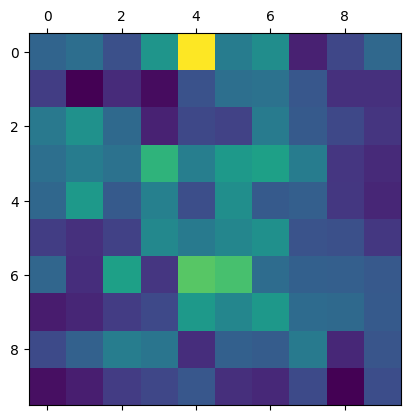

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        [model.input], [model.get_layer(last_conv_layer_name).output,model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)

        if pred_index is None:
            pred_index = tf.argmax(preds[0])
            print(pred_index)

        class_channel = preds[:,pred_index]
        print(class_channel)
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
last_conv_layer_name = 'separable_conv2d_24'
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)
from matplotlib import pyplot as plt
# Display heatmap
plt.matshow(heatmap)
plt.show()


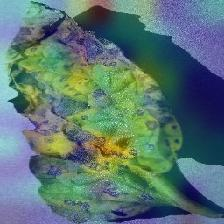

In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path,target_size=(224,224))
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # dd = cv2.resize(superimposed_img, (224, 224))
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

save_and_display_gradcam(path_img, heatmap)